In [189]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../datasets/students_simple.csv')

In [190]:
N = 22
income = df.iloc[:, N % 5]
print(income)
test_time = df.iloc[:, ((N ** 2) % 5) + 5]
print(test_time)

0     430
1     640
2     610
3     330
4     420
5     290
6     480
7     610
8     840
9     330
10    560
11    450
12    350
13    310
14    380
15    340
16    660
17    450
18    540
19    750
Name: income, dtype: int64
0      8.5
1      6.2
2      6.8
3     12.0
4      7.5
5     10.0
6      7.2
7      4.2
8      3.5
9      9.5
10     7.8
11     8.0
12     6.0
13     4.8
14     8.6
15    10.0
16     4.5
17    12.5
18    10.5
19     6.5
Name: test_time, dtype: float64


# 1. Расчет корреляций

## 1. Фехнера

### Корреляция Фехнера

Рассматриваются знаки отклонений наблюдений от среднего:
$\text{sign}(x_i - \overline{x})$ и $\text{sign}(y_i - \overline{y})$

При расчёте корреляции вычисляется разность между числом совпадающих знаков и числом несовпадающих, делённая на общее количество наблюдений:

$$
K = \frac{ \sum_{i=1}^{n} [\text{sign}(x_i - \overline{x}) = \text{sign}(y_i - \overline{y})] - [\text{sign}(x_i - \overline{x}) \ne \text{sign}(y_i - \overline{y})] }{n}
$$

Здесь оператор $[*]$ принимает значения:

* $[True] = 1$
* $[False] = 0$

### Область значений коэффициента корреляции

$$
K \in [-1, 1]
$$

* $K = 1$ — все знаки совпадают (полная прямая зависимость).
* $K = -1$ — все знаки противоположны (полная обратная зависимость).
* $K = 0$ — количество совпадающих и несовпадающих знаков одинаково (отсутствие зависимости).

In [191]:
income_mean = income.mean()
test_time_mean = test_time.mean()

income_sign = np.sign(income - income_mean)
test_time_sign = np.sign(test_time - test_time_mean)

same = np.sum(income_sign == test_time_sign)
diff = np.sum(income_sign != test_time_sign)

K = (same - diff) / len(income)
print("Коэффициент корреляции Фехнера:", round(K, 3))

Коэффициент корреляции Фехнера: -0.4


## Выводы по коэффициенту корреляции Фехнера

* Отрицательное значение говорит об обратной корреляции между признаками.
* K = -0.4 — умеренная обратная корреляция. [Таблица пороговых значений](https://st.mobiprint.ru/wp-content/uploads/2023/03/Fehner-teoriya.pdf) (Шкала Чеддока)
* Это означает, что при увеличении дохода наблюдается тенденция к уменьшению времени теста, и наоборот.
* Однако связь не является сильной

## 2. Корреляция Пирсона

Корреляция Пирсона учитывает не только знаки отклонений, но и абсолютные значения отклонений от среднего значения.

### Ковариация

Ковариация определяется как среднее произведение отклонений значений двух признаков от их средних значений:

$$
\text{cov} = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{n-1}
$$

Для приведения значений в интервал ([-1, 1]), ковариацию делят на произведение стандартных отклонений признаков:

$$
K = \frac{\text{cov}}{S_x S_y}
$$

где (S_x^2) — выборочная дисперсия признака (x):

$$
S_x^2 = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n-1}
$$

и аналогично для (S_y^2) — выборочной дисперсии признака (y):

$$
S_y^2 = \frac{\sum_{i=1}^{n} (y_i - \overline{y})^2}{n-1}
$$

In [192]:
pearson_corr = income.corr(test_time, method='pearson')
print("Коэффициент корреляции Пирсона:", round(pearson_corr, 3))

Коэффициент корреляции Пирсона: -0.57


* K=−0.57 — заметная обратная корреляция

## Проверка статистической значимости коэффициента корреляции Пирсона

Нулевая гипотеза $H_0$: переменные $x$ и $y$ некоррелированы, т.е. (K = 0).

При справедливости $H_0$, статистика

$$
T = \frac{K \sqrt{n-2}}{\sqrt{1-K^2}}
$$

имеет распределение:

* при $n < 30$ — распределение Стьюдента: $T \sim t_{n-2}$
* при $n \ge 30$ — стандартное нормальное распределение, так как при больших выборках t-распределение приближается к нормальному (с увеличением числа степеней свободы (которые зависят от размера выборки) распределение Стьюдента становится всё более похоже на нормальное. Это происходит, потому что "хвосты" распределения Стьюдента становятся менее "тяжёлыми" (ближе к нормальному распределению) [Первоисточник](https://wiki.loginom.ru/articles/students-distribution.html)).


### Критическая область критерия

Для уровня значимости $(\alpha = 0.05)$ критическое значение [Таблица критических значений t-критерия Стьюдента](https://statpsy.ru/t-student/t-test-tablica/):

$T_к = 2.101$

Если $|T| \ge T_к$, нулевая гипотеза $H_0$ отвергается, иначе — принимается.

In [193]:
n = len(income)
T = pearson_corr * np.sqrt(n - 2) / np.sqrt(1 - pearson_corr**2)
T_critical = 2.101
print("T:", round(T, 3))
print("Tк:", round(T_critical, 3))

T: -2.942
Tк: 2.101


Так как $|T| = 2.942 > 2.101$, то нулевая гипотеза $H_0$ отвергается.

Следовательно, между признаками `income` и `test_time` существует статистически значимая корреляция.

## 3. Корреляция Спирмена

Рангом $i$-го элемента выборки $x_i$ называется его порядковый номер $R(x_i)$ в упорядоченном ряду (вариационном ряду).

Корреляция Спирмена есть корреляция Пирсона над ранговыми наборами $(R(x_1), \dots, R(x_n))$ и $(R(y_1), \dots, R(y_n))$.

$$
K = \frac{
\sum_{i=1}^{n}
(R(x_i) - \overline{R(x)}) \cdot (R(y_i) - \overline{R(y)})
}
{
\left[
\left( \sum_{i=1}^{n} (R(x_i) - \overline{R(x)})^2 \right)
\cdot
\left( \sum_{i=1}^{n} (R(y_i) - \overline{R(y)})^2 \right)
\right]^{\frac{1}{2}}
}
$$

$$
K = 1 - \frac{6}{n (n-1) (n+1)} \sum_{i=1}^{n} \left( R(x_i) - R(y_i) \right)^2
$$

[Описание](https://wiki.loginom.ru/articles/rank-correlation-spearman.html)

In [194]:
spearman_corr = income.corr(test_time, method='spearman')
print("Коэффициент корреляции Спирмена:", round(spearman_corr, 3))

Коэффициент корреляции Спирмена: -0.539


* K=−0.539 

* Снова наблюдаем заметную обратную корреляцию.

## 4. Корреляция Кенделла 
$$ K = 1 - \frac{4}{n (n-1)} \sum_{i=1}^{n-1} \sum_{j=i+1}^{n} \left[ [x_i < x_j] \ne [y_i < y_j] \right] $$

[Описание](https://wiki.loginom.ru/articles/rank-correlation-kendall.html)

In [195]:
kendall_corr = income.corr(test_time, method='kendall')
print("Коэффициент корреляции Кенделла:", round(kendall_corr, 3))

Коэффициент корреляции Кенделла: -0.436


* Здесь наблюдаем умеренную обратную корреляцию

#### На основании анализа значений критериев можно сделать вывод о наличии умеренной-заметной обратной корреляции между доходами и временем прохождения теста

# 2. Визуализация

## 1. Гистограммы

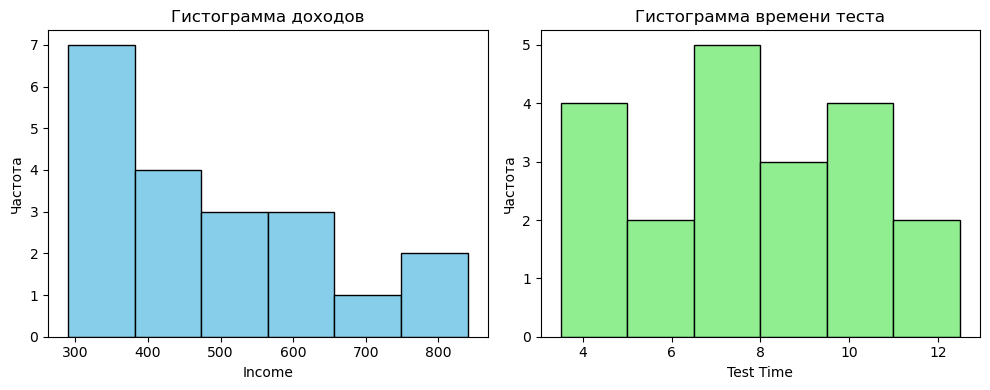

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(income, bins=6, color='skyblue', edgecolor='black')
plt.title('Гистограмма доходов')
plt.xlabel('Income')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(test_time, bins=6, color='lightgreen', edgecolor='black')
plt.title('Гистограмма времени теста')
plt.xlabel('Test Time')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

На основании гистограмм нельзя достоверно судить о наличии или направлении корреляции между доходом и временем теста.
Гистограммы лишь показывают распределения каждой переменной, а не их взаимосвязь.

## 2. График рассеяния (scatter plot)

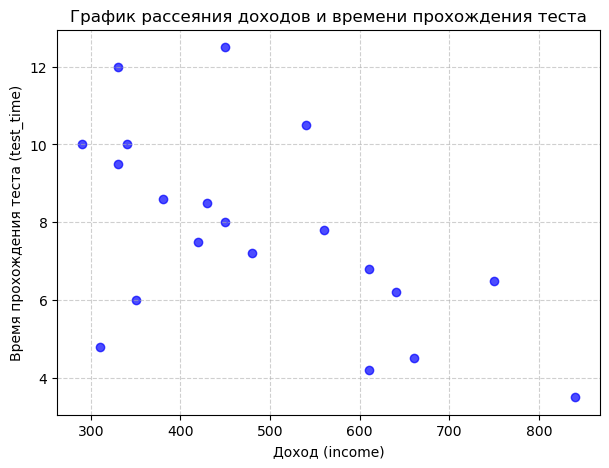

In [197]:
plt.figure(figsize=(7, 5))
plt.scatter(income, test_time, color='blue', alpha=0.7)
plt.title("График рассеяния доходов и времени прохождения теста")
plt.xlabel("Доход (income)")
plt.ylabel("Время прохождения теста (test_time)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

На графике прослеживается обратная линейная корреляция, однако много точек расположены очень далеко от предполагаемой линии

# 3. Уравнение регрессии

## Метод наименьших квадратов

Попробуем по выборочным данным восстановить вид зависимости $y$ от $x$.
Такая задача называется задачей регрессии.
В качестве регрессионной модели выберем, например, класс линейных функций (линейных по параметрам, модель $\hat{y}(x, w) = w_1 \ln x + w_0$ по-прежнему линейная).

$$
\hat{y}(x, w) = w_1 x + w_0
$$

Параметры $w$ будем подбирать для наилучшего соответствия нашей регрессионной модели истинным выборочным данным. Рассмотрим суммарный квадрат ошибок нашей модели:

$$
Q(w) = \sum_{i=1}^{n} (y_i - \hat{y}(x_i, w))^2 \rightarrow \min_{w}
$$

Оптимизационная задача решается:

* аналитически (не всегда можно найти) через необходимое условие минимума:

$$
\frac{\partial Q}{\partial w} = 0
$$

Для линейной модели

$$
\hat{y} = w_1 x + w_0
$$

коэффициенты находятся по формулам:

* Коэффициент наклона $w_1$:

$$
w_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

* Свободный член $w_0$:

$$
w_0 = \bar{y} - w_1 \bar{x}
$$

[Источник](https://books.econ.msu.ru/Introduction-to-Econometrics/chap02/2.2/)

Уравнение регрессии: y = -0.0092 * x + 12.2089


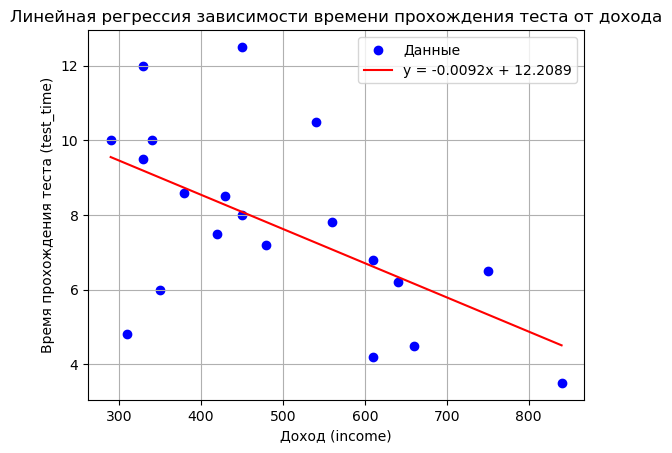

In [198]:
import numpy as np
import matplotlib.pyplot as plt

x = income
y = test_time

x_mean = np.mean(x)
y_mean = np.mean(y)

w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
w0 = y_mean - w1 * x_mean

print(f"Уравнение регрессии: y = {w1:.4f} * x + {w0:.4f}")

x_range = np.linspace(x.min(), x.max(), 100)
y_pred = w1 * x_range + w0

plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x_range, y_pred, color='red', label=f'y = {w1:.4f}x + {w0:.4f}')
plt.xlabel('Доход (income)')
plt.ylabel('Время прохождения теста (test_time)')
plt.title('Линейная регрессия зависимости времени прохождения теста от дохода')
plt.legend()
plt.grid(True)
plt.show()

In [199]:
def determination_coefficient(x, y, predict_func, model_name):
    x = np.array(x)
    y = np.array(y)
    y_pred = predict_func(x)
    y_mean = np.mean(y)
    sum_pred = np.sum((y - y_pred) ** 2)
    sum_mean = np.sum((y - y_mean) ** 2)
    r2 = 1 - (sum_pred / sum_mean)

    print(f"Коэффициент детерминации для {model_name} модели равен: {r2:.4f}")
    return r2

r2_linear = determination_coefficient(
    income,
    test_time,
    lambda x: w1 * x + w0,
    "линейной"
)

Коэффициент детерминации для линейной модели равен: 0.3248


In [200]:
from sklearn.linear_model import LinearRegression

x = income.values.reshape(-1, 1)
y = test_time.values

model = LinearRegression()
model.fit(x, y)

w1 = model.coef_[0]
w0 = model.intercept_

print(f"Уравнение регрессии: y = {w1:.4f} * x + {w0:.4f}")

Уравнение регрессии: y = -0.0092 * x + 12.2089


### 2. Квадратичная модель $ y = w_2 x^2 + w_1 x + w_0 $

Квадратичное уравнение регрессии: y = -0.00001759x^2 + 0.0097x + 7.6017


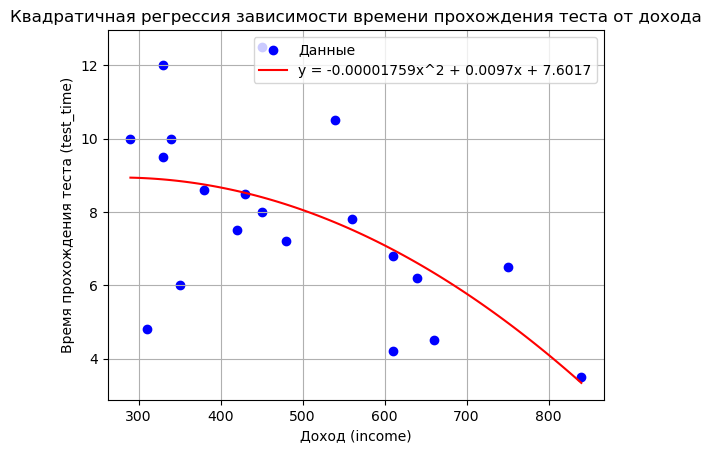

In [201]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

w0 = model.intercept_
w1, w2 = model.coef_[1], model.coef_[2]

print(f"Квадратичное уравнение регрессии: y = {w2:.8f}x^2 + {w1:.4f}x + {w0:.4f}")

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = model.predict(poly.transform(x_range))

plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x_range, y_pred, color='red', label=f'y = {w2:.8f}x^2 + {w1:.4f}x + {w0:.4f}')
plt.xlabel('Доход (income)')
plt.ylabel('Время прохождения теста (test_time)')
plt.title('Квадратичная регрессия зависимости времени прохождения теста от дохода')
plt.legend()
plt.grid(True)
plt.show()

In [202]:
r2_quadratic = determination_coefficient(
    income, 
    test_time, 
    lambda x: w2 * x**2 + w1 * x + w0, 
    "квадратичной"
)

Коэффициент детерминации для квадратичной модели равен: 0.3542


### 3. Гиперболическая $ y = \frac{w_1}{x} + w_0 $

мы можем свести её к линейной форме, введя замену переменной:

$$ z = \frac{1}{x} \quad \Rightarrow \quad y = w_0 \cdot z + w_1 $$

Гиперболическая модель: y = 1832.3465 / x + 3.6149


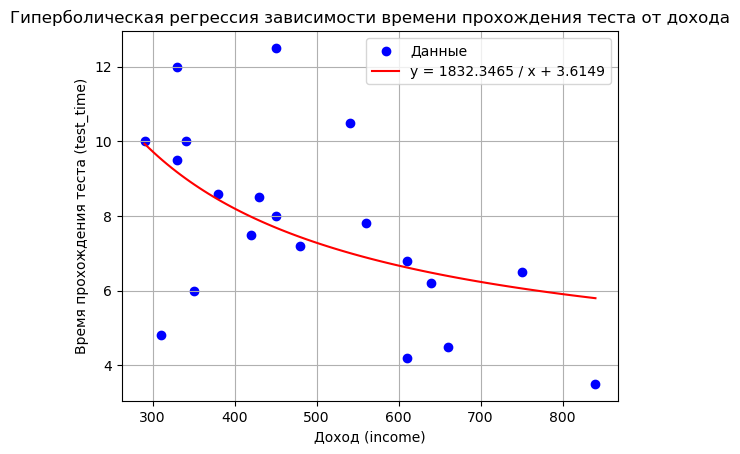

In [203]:
x = income
y = test_time

z = 1 / x

z_mean = np.mean(z)
y_mean = np.mean(y)

w1 = np.sum((z - z_mean) * (y - y_mean)) / np.sum((z - z_mean) ** 2)
w0 = y_mean - w1 * z_mean

print(f"Гиперболическая модель: y = {w1:.4f} / x + {w0:.4f}")

x_range = np.linspace(x.min(), x.max(), 100)
y_pred = w1 / x_range + w0

plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x_range, y_pred, color='red', label=f'y = {w1:.4f} / x + {w0:.4f}')
plt.xlabel('Доход (income)')
plt.ylabel('Время прохождения теста (test_time)')
plt.title('Гиперболическая регрессия зависимости времени прохождения теста от дохода')
plt.legend()
plt.grid(True)
plt.show()

In [204]:
r2_hyper = determination_coefficient(
    income, 
    test_time, 
    lambda x: w1 / x + w0, 
    "гиперболической"
)

Коэффициент детерминации для гиперболической модели равен: 0.2428


In [205]:
x = income.values.reshape(-1, 1)

x_hyper = 1 / x

model = LinearRegression()
model.fit(x_hyper, y)

w0 = model.intercept_
w1 = model.coef_[0]

print(f"Гиперболическое уравнение регрессии: y = {w1:.4f}/x + {w0:.4f}")

Гиперболическое уравнение регрессии: y = 1832.3465/x + 3.6149


### 4. Показательная $ y = w_0 \cdot w_1^x $
Модель имеет вид:
$$ y = w_0 \cdot w_1^x $$

Берём натуральный логарифм обеих частей:
$$ \ln y = \ln w_0 + x \ln w_1 $$

Введём обозначения:
$$ y' = \ln y, \quad a_0 = \ln w_0, \quad a_1 = \ln w_1 $$

Тогда получаем линейную модель:
$$ y' = a_1 x + a_0 $$

Из неё можно выразить исходные коэффициенты:
$$ w_0 = e^{a_0}, \quad w_1 = e^{a_1} $$

Показательная модель: y = 14.1216 * (0.9987)^x


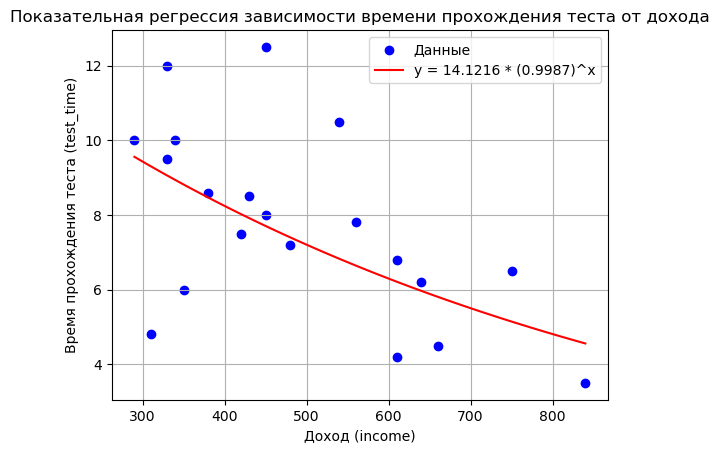

In [206]:
x = income
y = test_time

y_ln = np.log(y)

x_mean = np.mean(x)
y_ln_mean = np.mean(y_ln)

a1 = np.sum((x - x_mean) * (y_ln - y_ln_mean)) / np.sum((x - x_mean) ** 2)
a0 = y_ln_mean - a1 * x_mean

w1 = np.exp(a1)
w0 = np.exp(a0)

print(f"Показательная модель: y = {w0:.4f} * ({w1:.4f})^x")

x_range = np.linspace(x.min(), x.max(), 100)
y_pred = w0 * (w1 ** x_range)

plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x_range, y_pred, color='red', label=f'y = {w0:.4f} * ({w1:.4f})^x')
plt.xlabel('Доход (income)')
plt.ylabel('Время прохождения теста (test_time)')
plt.title('Показательная регрессия зависимости времени прохождения теста от дохода')
plt.legend()
plt.grid(True)
plt.show()

In [207]:
r2_exponential = determination_coefficient(
    income, 
    test_time, 
    lambda x: w0 * (w1 ** x), 
    "показательной"
)

Коэффициент детерминации для показательной модели равен: 0.2880


In [208]:
x = income.values.reshape(-1, 1)
Y = np.log(y)

model = LinearRegression()
model.fit(x, Y)

b0 = model.intercept_
b1 = model.coef_[0]

w0 = np.exp(b0)
w1 = np.exp(b1)

print(f"Показательная регрессия: y = {w0:.4f} * {w1:.4f}^x")

Показательная регрессия: y = 14.1216 * 0.9987^x


#### Коэффициент детерминации для линейной модели равен: 0.3248

#### Коэффициент детерминации для квадратичной модели равен: 0.3542

#### Коэффициент детерминации для гиперболической модели равен: 0.2428

#### Коэффициент детерминации для показательной модели равен: 0.2880

#### Из этих значений видно, что квадратичная модель лучше всего описывает зависимость test_time от income, а гиперболическая модель - хуже всего

# 4. Проверка уравнения регрессии

Для регрессионной модели определяется коэффициент детерминации:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \overline{y}_i)^2}
$$

Числитель

$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

показывает суммарные квадраты ошибок при использовании модели, а знаменатель

$$
\sum_{i=1}^{n} (y_i - \overline{y}_i)^2
$$

— при использовании среднего в качестве прогнозного значения. Коэффициент детерминации отражает, улучшается ли качество прогнозирования, используя регрессионную модель, по сравнению с предсказанием средним.

Нулевая гипотеза:

$$
H_0: \text{уравнение регрессии незначимо, } w=0
$$

При справедливости $H_0$, статистика

$$
F = \frac{R^2}{1-R^2} \cdot \frac{n-k}{k-1}
$$

имеет распределение Фишера

$$
F(k-1, n-k)
$$

где $k$ — число параметров модели.

Критическая область критерия: значения $F$, которые превышают $F_\text{крит}$ из таблицы распределения Фишера → отвергаем $H_0$.


[критические значения](https://books.econ.msu.ru/Introduction-to-Econometrics/chap03/3.app.A/)

In [209]:
from scipy.stats import f

def f_test_significance(R2, n, k, alpha=0.05, model_name="модели"):
    df1 = k - 1
    df2 = n - k
    
    F_stat = (R2 / (1 - R2)) * (df2 / df1)
    
    F_crit = f.ppf(1 - alpha, df1, df2)
    
    significant = F_stat >= F_crit
    
    print(f"F-тест для {model_name}:")
    print(f"  F = {F_stat:.4f}")
    print(f"  Критическое значение F_crit = {F_crit:.4f}")
    print(f"  Модель {'значима' if significant else 'не значима'}")

f_test_significance(r2_quadratic, len(income), 3, model_name="квадратичной")

f_test_significance(r2_hyper, len(income), 2, model_name="гиперболической")

F-тест для квадратичной:
  F = 4.6615
  Критическое значение F_crit = 3.5915
  Модель значима
F-тест для гиперболической:
  F = 5.7709
  Критическое значение F_crit = 4.4139
  Модель значима


#### Обе модели показывают статистическую значимость.